In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [62]:
folder_path = r'C:\Users\Rafael_Fagundes\Downloads\compiled_data.csv'

df = pd.read_csv(folder_path)

In [63]:
df_filtered = df[
          #& (~df['Display Funnel Mapped'].isin(['Passive Prospects', 'Demand Creation']))
            (df['Fiscal Quarter'].isin(['2024-Q3']))
            & (df['Audience Type'].isin(['3PD']))
            & (df['BU'].isin(['CSB']))
            & (df['Display Dell Vehicle Mapped'].isin(['Display','Display Mobile','Display Dco']))
            & (df['Country_x'].isin(['United States']))
               ]

In [64]:
info_dict = {
    'Column': df_filtered.columns,
    'Non-Null Count': df_filtered.count().values,
    'Dtype': df_filtered.dtypes.values
}

pd.DataFrame(info_dict)

,Column,Non-Null Count,Dtype
0,Unnamed: 0,11659,int64
1,Audience Type,11659,object
2,Tactic,11659,object
3,Media Buy Name,11659,object
4,Campaign Name,11659,object
5,Fiscal Quarter,11659,object
6,Fiscal Week,11659,object
7,Country_x,11659,object
8,Display Funnel Mapped,11659,object
9,Display Dell Vehicle Mapped,11659,object


In [65]:
box_df = df_filtered.groupby(['Display Funnel Mapped','Campaign Name','Media Buy Name'])[['Impressions', 'Clicks', 'Spend', 'Net Rev']].sum().reset_index()
box_df['ROAS'] = box_df['Net Rev'] / box_df['Spend']  # Fix the assignment to 'ROAS'
box_df['CTR'] = box_df['Clicks'] / box_df['Impressions']  # Fix the assignment to 'CTR'
box_df['CPC'] = box_df['Spend'] / box_df['Clicks']  # Fix the assignment to 'CTR'


In [71]:
desc_box_df = box_df.replace([np.inf, -np.inf], np.nan).dropna()

desc_box_df[desc_box_df['Display Funnel Mapped'].isin(['Active Prospects'])].describe()

,Impressions,Clicks,Spend,Net Rev,ROAS,CTR,CPC
count,1.043000e+03,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.165577e+05,387.537872,506.070830,3023.974286,3.996099,0.001402,15.584735
std,9.172621e+05,6868.617055,1892.805234,19225.462647,12.069758,0.007876,17.643059
min,1.000000e+01,-1.000000,0.004481,0.000000,0.000000,-0.000122,-36.646093
25%,1.584700e+04,5.000000,45.953889,0.000000,0.000000,0.000148,5.119365
50%,5.132500e+04,12.000000,149.582013,0.000000,0.000000,0.000303,10.109024
75%,1.534825e+05,34.000000,393.114274,1031.720000,2.632558,0.000590,19.124389
max,2.114907e+07,196080.000000,34899.510000,395842.380000,195.315858,0.125000,183.731395


In [68]:
filtered_box.describe()

,Impressions,Clicks,Spend,Net Rev,ROAS,CTR,CPC
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,7.723526e+05,263.750000,2164.047500,895.466667,0.379311,0.000351,9.956642
std,3.320124e+05,157.439815,875.882072,883.737568,0.338507,0.000154,4.589828
min,3.737790e+05,67.000000,1045.650000,0.000000,0.000000,0.000082,5.669901
25%,5.337742e+05,153.500000,1527.762500,127.990000,0.071924,0.000282,6.001712
50%,7.749460e+05,276.500000,2101.560000,912.135000,0.318352,0.000367,9.030839
75%,8.943395e+05,314.000000,2668.635000,1194.970000,0.619425,0.000452,10.919515
max,1.458936e+06,630.000000,3813.550000,2664.970000,0.913885,0.000548,18.813484


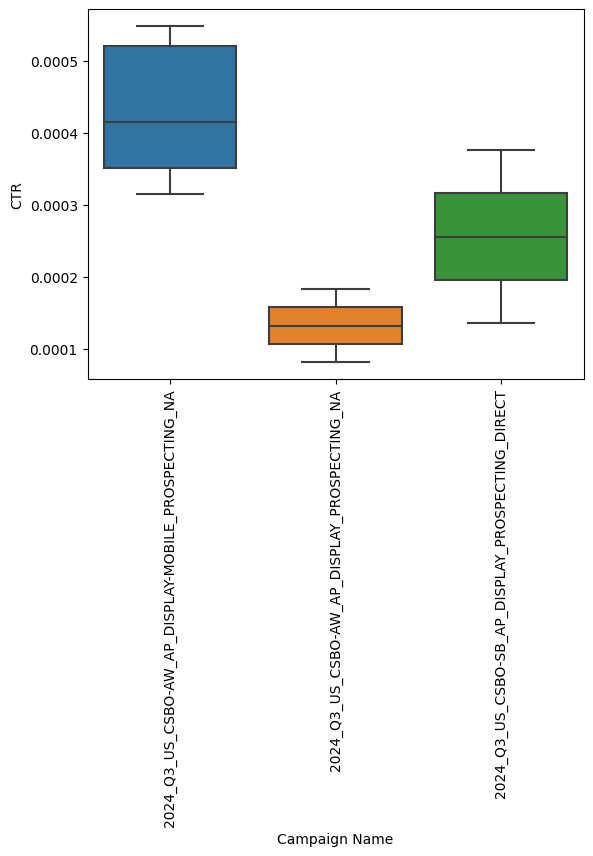

In [69]:
# Create the boxplot
ax = sns.boxplot(data=filtered_box, x='Campaign Name', y='CTR')

# Rotate x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()